# Backpropagation

As an error-based supervised learning technique, the use of Feedforward Neural Networks is dependent on us having a means of estimating how well our model performs on individual training examples, and having a mechanism to update the parameters of the model based on the estimation of that performance. In this section we cover how this is done for the Neural Network. We begin with a high-level perspective on backpropagation, before we examine the derivation of the equations involved, and detail the backpropagation algorithm itself. 

## Preliminaries 
We begin by reintroducing some definitions from our Logistic Regression and Linear Regression notes. 

In [9]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def standardize(x):
    col_means = np.mean(x,axis=0)
    col_std = np.std(x,axis=0)
    return (x - col_means) / col_std , col_means, col_std

## Overview of Backpropogation Equations 

For linear and logistic regression we calculated the change to be made to model parameters directly using the partial derivative of the model's error surface with respect to each individual parameter. For neural networks the approach of calculating the partial derivatives for all parameters in parallel will not work due to the layered nature of the network. 

Instead of depending on these parallel weight adjustments, the backpropagation algorithm gives us a way to estimate the error derivatives for nodes found in hidden layers by taking the error derivatives in subsequent layers and redistributing that derivative amongst all nodes that lead into a given node in a way that is dependent on the strength of weights. 

![Backprop](figures/backprop.png)

To illustrate consider the simple constellation of neurons above where superscript refers to layer number, subscript refers to individual units within a layer and $\delta$ denotes the error derivative for a given unit. Assuming we have computed error derivative $\delta^{2}_{1}$ successfully, we will use that error derivative along with the weights from layer 1 to layer 2 and the activation values for layer 1 to estimate an error derivative for each neuron in layer 1. In vectorized notation this is: 

\begin{equation}
\delta^{l} = (\theta^{l})^{T}\; \delta^{l+1} .\times g'(z^{l}) 
\end{equation}

where $g'(z^{l})$ is the partial derivative of the $L^{th}$ layer's activation function and is given by: 

\begin{equation}
g'(z^{l}) = a^{l} \; (1-a^{l})
\end{equation}

We can use this method to calculate error derivatives for each of the hidden layers. We do not do this for the input layer as there is by definition no error in the input layer as the activation values from the input layer are taken directly from our input vector $x$ which should not change. Note that $.\times$ is used here to denote the array multiplication operation, i.e. the element wise multiplication of two matrices where either both matrices have the same size or one matrix is a scalar. This is very different to the matrix multiplication operator. 

The backpropagation algorithm involves the recursive application of $\delta$ from the output layer through each of the hidden layers. 

For the output layer there is no succeeding layer on which we can base a recursive calculation of $\delta$. Instead for the output layer we calculate the error derivatives $\delta$ directly using a non-recursive definition that includes the difference between activation values and target values for the output layer. This separate calculation of $\delta$ is given below:

\begin{equation}
\delta = (a-y) .\times g'(z^{l}) 
\end{equation}

or given the definition of $g'(z^{l})$ established above: 

\begin{equation}
\delta = (a-y) \; (a \; (1-a)) 
\end{equation}

The backpropagated value for $\delta$ establishes the gradient of the error associated with each hidden unit in the network, but this value in itself does not say anything about the changes which we should make to our parameters $\theta$ to improve classification. Changes to our parameter weights are calculated with a separate equation that makes use of the calculated values for $\delta$ along with activation values. Specifically the changes to be made to individual weights are given in a vectorized form below: 

\begin{equation}
  \Delta^{l-1} = \delta \; a^{l-1}_{i}  
\end{equation}

where $\Delta$ is defined as the partial derivative of error with respect to individual weights. 

As with linear and logistic regression we accumulate errors over a number of different training examples. We denote the total updates for node j in layer l by $\Delta_{ij}^{l}$. 


## Deriving the Backpropagation Equations

In the notes above we simply stated the equations that are used to implement backpropagation. Based on these equations it is possible to implement backpropagation correctly, but it is useful to understand the derivation of these equations -- particularly since the derivations are straightforward. In the following we outline those derivations. 

### Error
The goal of the Backpropagation Algorithm is to find an adjustment to each weight in the network to reduce total error. 

We can calculate the total error for a single training example for a single output neuron of the network using the sum of squared error function: 

\begin{equation*}
   E = \frac{1}{2} (y - a)^{2}
\end{equation*}

where $a$ is the actual activation values for an output unit and $y$ is the expected values of the unit for a training case. Note that our usual sum over training cases $\sum$ is missing because for notational clarity we are dealing with the result for a single training case rather than the set of training cases. 

### Calculating Error Gradients for the Output Units 

Our goal in training a neuron is to determine the changes we can make to individual weights leading into the neuron in order to reduce this error. To determine the best changes to make to the weights we calculate the partial derivative of the error with respect to individual input weights. 

\begin{equation}
\frac{\partial E}{\partial \theta_{i}}
\end{equation}

where $i$ is the $i^{th}$ input to the neuron (including a bias input). While this notation is common, it does not take account of the layered structure of the network. The weights $\theta_{i}$ actually technically belong not to the layer which we are calculating the error derivative for, $l$, but to the proceeding layer $l-1$. Therefore we can more correctly write the above as:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}}
\end{equation}

This figure is the gradient of the error surface for a given weight. Knowing it we can adjust our weights to try to minimize the error. However this figure is difficult to compute directly. To compute it we rely on the chain rule in order to calculate this figure in terms of a number of components: 

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}  \frac{\partial z}{\partial \theta^{l-1}_{i}}
\end{equation}

The first of these three components can be derived directly using the power rule. 

\begin{align*}
                             E &= \frac{1}{2} (y - a)^{2}\\
 \frac{\partial E}{\partial a} &= 2 (\frac{1}{2}) (y-a)^{1} (-a^{0})\\
                               &= (y-a) (-1)\\
                               &= a-y
\end{align*}

The second of these $\frac{\partial a}{\partial z}$ is referred to in some sets of notes as $g'(z)$ since it is the derivative of the logistic function. This partial derivative is mathematically more tough than the component above and is dependent on the known derivative of the logistic function $a = \frac{1}{1+e^{-z}}$. This partial derivative is: 

\begin{equation}
 \frac{\partial a}{\partial z} = a (1-a) 
\end{equation}

The third component $\frac{\partial z}{\partial \theta^{l-1}_{i}}$ can be calculated relatively straightforwardly from the definition of $z$. (In the notation below we introduce superscripts to denote layers.)

\begin{align*}
   z^{l} &= \sum_{i=1}^{N} ( \theta^{l-1}_{i} a^{l-1}_{i} ) + b^{l-1} * 1\\
  \frac{\partial z}{\partial \theta^{l-1}_{i}} &= (\theta^{l-1}_{i})^{0} * a^{l-1}_{i}\\
                                         &= 1 * a^{l-1}_{i}\\
                                         &= a^{l-1}_{i}
\end{align*}

Combining these three factors gives us an equation for the gradient of the error with respect to an individual input weight:

\begin{equation}
\frac{\partial E}{\partial \theta^{l-1}_{i}} = (a-y) \; (a (1-a)) \; a^{l-1}_{i}
\end{equation}

This is the basic form of the **delta rule**. The delta rule defines the error with respect to individual weights but simultaneously defines the changes we need to make to the weight in order to reduce the error. If the derivative is low we are close to an error minimum and thus make a small change to the weights. If the derivative is much higher we are far away from a minimum and thus must make a much larger change to the weights. 

Rather than writing $\frac{\partial E}{\partial \theta^{l-1}_{i}} $ for the derivative of the error with respect to weights we often write an upper case delta $\Delta$. Similarly by convention we often write $ \frac{\partial E}{\partial z} = \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}$, the derivative of the Error with respect to the input of a unit, simply as a lower case delta $\delta$. These notational conventions are summarized below:

\begin{align*}
  \Delta^{l-1} &= \frac{\partial E}{\partial \theta^{l-1}_{i}} \\
  \Delta^{l-1} &= \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z}  \frac{\partial z}{\partial \theta^{l-1}_{i}} \\
  \Delta^{l-1} &= (a-y) \; (a (1-a)) \; a^{l-1}_{i}  \\
  \delta &= \frac{\partial E}{\partial z} \\
  \delta &= \frac{\partial E}{\partial a}  \frac{\partial a}{\partial z} \\
  \delta &= (a-y) \; (a (1-a)) 
\end{align*}

Therefore

\begin{equation}
  \Delta^{l-1} = \delta \; a^{l-1}_{i}  
\end{equation}

or 

\begin{equation}
  \Delta = \delta^{l+1} \; a_{i}  
\end{equation}

### Calculating Error Gradients for Hidden Layer Units 

Note that $\Delta$ is dependent on the activation values of the nodes connected by a given weight and on the target value for the node in the second layer. The target value for the second layer node when that second layer is the output layer is given directly to us. But when that second node is in a hidden layer we can't directly say what the target value should be for a hidden node. 

For nodes in the hidden layers we get around this problem by calculating $\frac{\partial E}{\partial a}$ in a different way.  Instead we use the principle of backpropagation to take the error derivative in a node in a later layer and pass the blame back to nodes in the preceeding layer in a way that is proportional to the weights connecting the layers. This idea of propagating the error backwards is directly analogous to the propagation of activation forwards through the network. While many sets of notes describe this as the backpropagation of the error, it is important to understand that we are in fact backpropagating $\delta$, i.e., the derivative of the error with respect to logit values. 

Breaking this down, the partial derivative of the total Error with respect to the activation of a neuron in the $l-1^{th}$ row is equal to the sum of partial derivative of errors on neurons in the $l^{th}$ row with respect to the activation of the neuron in the $l-1^{th}$ row, i.e.,: 

\begin{equation}
    \frac{\partial E^{l-1}}{\partial a^{l-1}} = \sum_{j}  \frac{\partial E_{j}^{l}}{\partial a^{l-1}} 
\end{equation}

The partial derivative of the error in a row $l$ neuron with respect to the activation of a row $l-1$ neuron can be broken down as follows: 

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} =  \frac{\partial E^{l}}{\partial a^{l}} \frac{\partial a^{l}}{\partial z^{l}}  \frac{\partial z^{l}}{\partial a^{l-1}}
\end{equation}

The first two components of this equation have been seen before above. They are:

\begin{align*}                   
 \frac{\partial E^{l}}{\partial a^{l}} &= a^{l}-y^{l} \\
 \frac{\partial a^{l}}{\partial z^{l}}  &= a^{l} (1-a^{l}) 
\end{align*}

The third component $\frac{\partial z^{l}}{\partial a^{l-1}}$ can be calculated in an analogous way to how we calculated $\frac{\partial z}{\partial \theta^{l-1}_{i}}$ previously, i.e., 

\begin{align*}
   z^{l} &= \sum_{i=1}^{N} ( \theta^{l-1}_{i} a^{l-1}_{i} ) + b^{l-1} * 1\\
  \frac{\partial z^{l}}{\partial a^{l-1}} &= \theta^{l-1}_{i} * (a^{l-1}_{i})^{0}\\
                                      &= \theta^{l-1}_{i} * 1\\
                                      &= \theta^{l-1}_{i}
\end{align*}

Plugging these components back in to our definition of $\frac{\partial E^{l}}{\partial a^{l-1}}$ we have:

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} = (a^{l}-y^{l}) \;  a^{l} (1-a^{l}) \; \theta^{l-1}_{i}
\end{equation}

or 

\begin{equation}
 \frac{\partial E^{l}}{\partial a^{l-1}} = \delta^{l} \; \theta^{l-1}_{i}
\end{equation}

since we previously established $\delta^{l} = (a^{l}-y^{l}) \;  a^{l} (1-a^{l}) $. 

Plugging this into our definition of $\frac{\partial E^{l-1}}{\partial a^{l-1}}$ we have:

\begin{equation}
    \frac{\partial E^{l-1}}{\partial a^{l-1}} = \sum_{j} \delta^{l} \; \theta^{l-1}_{i}
\end{equation}

which in turn can be plugged in to our $l-1$ definition of the $\Delta$ rule equation:

\begin{equation}
\frac{\partial E^{l-1}}{\partial \theta^{l-2}_{i}} = \frac{\partial E^{l-1}}{\partial a^{l-1}}  \frac{\partial a^{l-1}}{\partial z^{l-1}}  \frac{\partial z^{l-1}}{\partial \theta^{l-2}_{i}}
\end{equation}

to give

\begin{equation}
\frac{\partial E^{l-1}}{\partial \theta^{l-2}_{i}} =  \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} )  \frac{\partial a^{l-1}}{\partial z^{l-1}}  \frac{\partial z^{l-1}}{\partial \theta^{l-2}_{i}}
\end{equation}

But 
\begin{equation}
  \delta^{l-1} = \frac{\partial E^{l-1}}{\partial a^{l-1}}  \frac{\partial a^{l-1}}{\partial z^{l-1}} 
\end{equation}

Therefore, we have a recursive definition of $\delta$:

\begin{equation}
  \delta^{l-1} = \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} ) \frac{\partial a^{l-1}}{\partial z^{l-1}} 
\end{equation}

or 

\begin{equation}
  \delta^{l-1} = \sum_{j} ( \delta^{l} \; \theta^{l-1}_{i} ) \; g'(z^{l-1}) 
\end{equation}

Expressing this in terms of the $l^{th}$ layer we have:

\begin{equation}
  \delta^{l} = \sum_{j} ( \delta^{l+1} \; \theta^{l}_{i} ) \; g'(z^{l}) 
\end{equation}

i.e., $\delta$ or $\frac{\partial E}{\partial z}$ in a given layer $l-1$ is defined in terms of the values of $\delta$ for layer $l$. This is important as it allows us to define $\delta$ and in turn $\Delta$ in hidden layers without needing to know exactly what expected value a unit should have. 


## The Backpropagation Algorithm 

The Backpropagation Algorithm itself involves the systematic calculation of $\delta$ and $\Delta$ across layers starting with the output layers. 

Given

> A set of training data $ Data_{Training} = \{ (x^{0},y^{0}),(x^{1},y^{1}),(x^{2},y^{2})\dots (x^{m-1},y^{m-1}) \}$

> A network with weights randomly initialized between -1 and 1 

For each instance i in the training data:

> Forward Propagate $x[i]$ through the network 

> Backpropagate Error Derivatives back through the network

> > Calculate error derivative for final layer using $\delta = (a-y) \; (a (1-a))$ for $y[i]$

> > Calculate error derivative for hidden layers using $ \delta^{l} = \sum_{j} ( \delta^{l+1} \; \theta^{l}_{i} ) \; g'(z^{l})$

> > For each hidden layer accrue weight updates $\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + a_{j}^{(l)}\delta_{i}^{(l+1)} $

> Update weights with accrued weight changes $\theta = \theta + \Delta$

The implementation of this algorithm is relatively straightforward, but there are some important points to keep in mind. We do not in practice calculate errors for bias units. The reason for this is that the error in a bias unit is not back-propagated to previous layers since bias units do not have weights leading into them. However the weights leading out from bias units do have calculated errors. These errors are calculated on the basis of the activation of the bias unit on the errors on nodes in the $i+1^{th}$ layer. 

### Implementation 

In [10]:
# In this implementation we force all vectors to be true 2D arrays with 1 column rather than
# numpy 1D arrays. This makes it easier to use matirx operations. 

class Backpropogation: 
    
    def __init__(self,x,y,s):
        # set class references to X and Y
        self.X = x
        self.Y = y
        self.S = s
        # Define empty arrays for activation
        self.a     =  [None] * len(self.S)
        # Define empty array for z values (i.e., inputs) 
        self.z     =  [None] * len(self.S)
        # Define empty arrays for weights
        self.theta =  [None] * len(self.S)
        # Define empty array for error derivitives for indivual units
        self.delta =  [None] * len(self.S)
        # Define empty arrays for accumulated errors on weights
        self.Delta =  [None] * len(self.S)

        # Randomly Initialize the weights for all layers
        for idx, val in enumerate(self.S):
            if idx == (len(self.S)-1): # ouput layer has no weights
                break
            self.theta[idx] = np.random.rand( self.S[idx]+1,self.S[idx+1])

    # calculate the squared error given a list of actual values and a list of target values
    def sqError(self,a,y):
        return np.sum(np.multiply(0.5,(a-y)**2))

    def forwardProp(self,x): 
        # Forward propogate activation 
        # For each layer from input to output
        for idx, val in enumerate(self.S):
            if idx == 0:
                # construct the activation values for the input layer from X and a bias value
                self.a[idx] = np.atleast_2d(np.hstack(([1.0],x))).T
            elif idx == (len(self.S)-1):
                # calculate z for the output layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for the output layer∂E/∂zⱼ * ∂zⱼ/∂wᵢ
                self.a[idx] = 1 / (1 + np.exp(-self.z[idx]))
            else:
                # calculate z for a hidden layer
                self.z[idx] = np.atleast_2d(np.matmul(self.theta[idx-1].T,self.a[idx-1]))
                # calculate a for a hidden layer
                self.a[idx] = np.vstack(([1.0],1 / (1 + np.exp(-self.z[idx]))))
        # return the actual output values for the output layer 
        return self.a[len(self.S)-1]
    
    def predict(self,X):
        results = []
        for datum in X:
            results.append(self.forwardProp(datum))
        return np.squeeze(results)
            
    def backwardProp(self,y):
        # For each layer from output to input 
        for idx, val in reversed(list(enumerate(self.S))): 
            if idx == (len(self.S)-1):
                # calculate ∂a/∂z for the output layer  
                gprimez = np.multiply(self.a[idx],(1 - self.a[idx]))
                # ∂E/∂zⱼ
                self.delta[idx] = np.multiply(self.a[idx] - y,gprimez)
            elif idx == 0:
                # we need to update the weights in the 0th layer but we don't propogate error
                # derivitive back to the input units. 
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T
            else:
                # calculate the error for all other layers

                # 1. calculate the derivitive of a with respect to z
                gprimez = np.multiply(self.a[idx],(1 - self.a[idx]))

                # 2. calculate the error associatd with each node in the current layer. 
                self.delta[idx] = np.multiply(np.matmul(self.theta[idx],self.delta[idx+1]),gprimez)

                # get rid of the bias unit
                self.delta[idx] = self.delta[idx][1:,:]    

                # 3. update the accumulated change
                self.Delta[idx] = self.Delta[idx] + np.matmul(self.delta[idx+1],self.a[idx].T).T

        return self.sqError(self.a[len(self.S)-1],y)

    def train(self,epochs):
        errors = []
        # For each training epoch 
        for k in range(epochs):
            error = 0
            # Initialize Delta for this epoch
            for idx, val in enumerate(self.S):
                if idx < (len(self.S)-1): # ouput layer has no weights
                    self.Delta[idx] = np.zeros((self.S[idx]+1,self.S[idx+1]))
            # Iterate over all training examples 
            for i, y in enumerate(self.Y):     
                self.forwardProp(self.X[i])
                error += self.backwardProp(y)
            errors.append(error)
            # For each layer from output to input 
            for idx, val in reversed(list(enumerate(self.S))): 
                if idx < (len(self.S)-1):
                    # Update the weights
                    self.theta[idx] = self.theta[idx] - (1/len(self.Y)) * self.Delta[idx] 
        return errors 
 
    def test(self): 
        for i, y in enumerate(self.Y):     
            output = self.forwardProp(self.X[i])
            print(self.X[i])
            print(output)
            print("---")

To test our neural network implementation we will begin with the simple example of a XNOR operation. This is a classic example in Neural Network training as it is one of the more basic operations that cannot be learned without hidden units. For XNOR we have 1 output variable and 2 input variables where all variables are binary. As a reminder from the last section, this is the truth table for the XNOR operation:

x1 | x2 | x1 XNOR x2
--- | --- | :---:
0 |	0 |	1
0 |	1 |	0
1 |	0 |	0
1 | 1 | 1

[0 0]
[[ 0.04680172]]
---
[0 1]
[[ 0.95777949]]
---
[1 0]
[[ 0.95766226]]
---
[1 1]
[[ 0.04506428]]
---


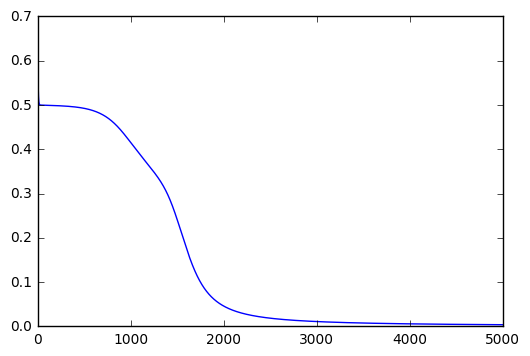

In [11]:
# Define the training data
Y = np.array([  0,1,1,0])
X1 = np.array([ 0,0,1,1])
X2 = np.array([ 0,1,0,1])
X = np.vstack((X1,X2)).T

# Define the number of (visible) units in each layer 
s = [2,2,1]    
    
# Instantiate the network with data and topology, before running training and printing results
bp = Backpropogation(X,Y,s)
errors = bp.train(5000)
bp.test()

# Visualize Error over Epochs 
plt.plot(errors)
plt.show()

For a second example we will look again at the non-linear logistic regression example that we previously considered. In this case the positive examples are clustered together and negative examples form a ring around that cluster as illustrated below. 

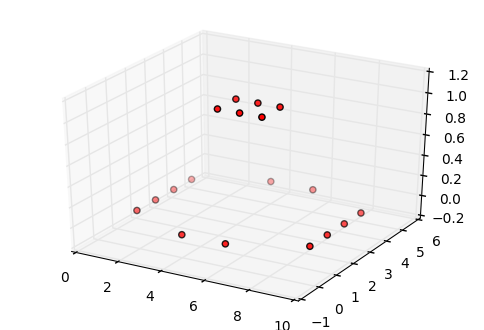

In [12]:
# Define the training data
Y = np.array([ 0,0,0,0,0,       1,1,1,  0,0,    1,1,1,     0,0,0,0,0])
X1 = np.array([4,6,1,9,1,       4,5,6,  9,1,    4,5,6,     9,1,9,4,6])
X2 = np.array([0,0,1,1,2,       2,2,2,  2,3,    3,3,3,     3,4,4,5,5])
X = np.vstack((X1,X2)).T

# standardize our input features
X, means, stds = standardize(X)

# Plot the training data in our usual way where the Target variable occupies the z-axis 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, c='r', marker='o')
plt.show()

Given this data we can define and train a classification with two hidden layers that can learn the appropriate non-linear decision boundary. 

[-0.36380344 -1.75561721]
[[ 0.00195852]]
---
[ 0.36380344 -1.75561721]
[[ 0.1342852]]
---
[-1.45521375 -1.05337032]
[[ 0.00141396]]
---
[ 1.45521375 -1.05337032]
[[ 0.13361404]]
---
[-1.45521375 -0.35112344]
[[ 0.00165959]]
---
[-0.36380344 -0.35112344]
[[ 0.81240307]]
---
[ 0.         -0.35112344]
[[ 0.99393432]]
---
[ 0.36380344 -0.35112344]
[[ 0.99496586]]
---
[ 1.45521375 -0.35112344]
[[ 0.005003]]
---
[-1.45521375  0.35112344]
[[ 0.00337739]]
---
[-0.36380344  0.35112344]
[[ 0.99518003]]
---
[ 0.          0.35112344]
[[ 0.99347137]]
---
[ 0.36380344  0.35112344]
[[ 0.79860997]]
---
[ 1.45521375  0.35112344]
[[ 0.0030572]]
---
[-1.45521375  1.05337032]
[[ 0.12632479]]
---
[ 1.45521375  1.05337032]
[[ 0.002788]]
---
[-0.36380344  1.75561721]
[[ 0.14242576]]
---
[ 0.36380344  1.75561721]
[[ 0.00340633]]
---


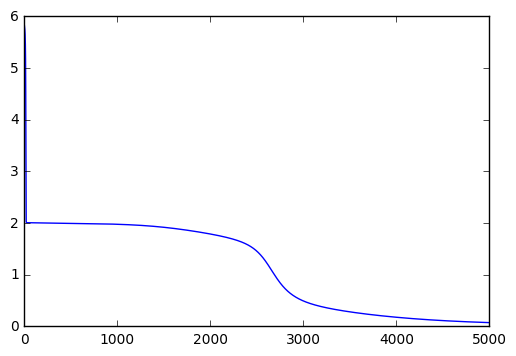

In [13]:
# Define the number of (visible) units in each layer 
s = [2,8,8,1]    
    
# Instantiate the network with data and topology, before running training 
bp = Backpropogation(X,Y,s)
errors = bp.train(5000)
bp.test()

# Visualize Error over Epochs 
plt.plot(errors)
plt.show()

## Backpropagation the Easy Way

Using TensorFlow we can take advantage of existing Optimization algorithms to quickly perform gradient descent even across complex networks. 


In [14]:
import tensorflow as tf

# Define the training data
Y = [[0],[0],[0],[0],[0],[1],[1],[1],[0],[0],[1],[1],[1],[0],[0],[0],[0],[0]]
X = [[4,0],[6,0],[1,1],[9,1],[1,2],[4,2],[5,2],[6,2],[9,2],[1,3],[4,3],[5,3],[6,3],[9,3],[1,4],[9,4],[4,5],[6,5]]

# Define the number of (visible) units in each layer 
S = [2,8,8,1]

learning_rate = 0.001

x = tf.placeholder("float", shape=[None, S[0]])
y = tf.placeholder("float", shape=[None, S[3]])

weights = {
    'h1': tf.Variable(tf.random_normal([S[0], S[1]])),
    'h2': tf.Variable(tf.random_normal([S[1], S[2]])),
    'out': tf.Variable(tf.random_normal([S[2], S[3]]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([S[1]])),
    'b2': tf.Variable(tf.random_normal([S[2]])),
    'out': tf.Variable(tf.random_normal([S[3]]))
}

def ff_network(x, weights, biases):
    # Hidden layer with sigmoid activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.sigmoid(layer_1)
    # Hidden layer with sigmoid activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.sigmoid(layer_2)
    # Output layer with linear activation
    logits = tf.matmul(layer_2, weights['out']) + biases['out']
    return logits

pred = ff_network(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    _, c = sess.run([optimizer, cost], feed_dict={x: X, y: Y})
    print(c)

print("Done.")

0.0
Done.


Here is some nice code for generating a visualization of the Tensorflow graph. It isn't particularly useful for visualizing the network structure, but it does give a good intuition into the Tensorflow execution methods. 

In [15]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [16]:
show_graph(tf.get_default_graph().as_graph_def())

### Assignment
Visualize the decision boundary in the TensorFlow implementation. 